In [1]:
from keras.datasets import imdb
import numpy as np
from keras import optimizers
from keras import losses
import matplotlib.pyplot as plt

Using TensorFlow backend.


##we are using only 10000 most frequent occuring words in the dataset hense num_words =10000

In [2]:
(train_data, train_labels),(test_data, test_labels) =imdb.load_data(num_words=10000)

In [3]:
train_data.shape

(25000,)

In [4]:
test_data.shape

(25000,)

In [5]:
train_labels.shape

(25000,)

In [6]:
train_labels[0]

1

In [7]:
test_labels[1]

1

In [8]:
train_labels[0]

1

In [9]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [10]:
max([max(sequence) for sequence in train_data])

9999

In [11]:
max([max(sequence) for sequence in test_data])

9999

## we try to decod the already encoded reviews into words from integer index. We use the word_index() which is a dict that maps words to integer index

In [12]:
my_words =imdb.get_word_index()
my_reversed_words = dict([(value, key) for value, key in my_words.items()])
decoded_words =','.join([my_reversed_words.get(i -3, '?') for i in train_data[0]])

In [13]:
decoded_words

'?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?'

In [14]:
# word_index =imdb.get_word_index()
# reverse_word =dict([(value, key) for value, key in word_index.items()])
# decod_word =' '.join([reverse_word.get(i - 3, '?') for i in test_data[0]])
# decod_word

## We encode the interger lists into integer tensor so we Create a vectorisation and an all zero matrix of shape(len(sequences), dimension)

In [15]:
def vectorised_sequence(sequences, dimension=10000):
    results =np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i , sequence] = 1.
    return results
x_train = vectorised_sequence(train_data)
x_test  = vectorised_sequence(test_data)

In [16]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

## we convert  or vectorise our labels as well into float 

In [17]:
y_train =np.asarray(train_labels).astype('float32')
y_test =np.asarray(test_labels).astype('float32')

In [18]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [19]:
y_train[1]

0.0

In [20]:
y_test[1]

1.0

In [21]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [22]:
x_train[1]

array([0., 1., 1., ..., 0., 0., 0.])

# We build our network

In [23]:
from keras import layers
from keras import models
network =models.Sequential()

In [24]:
network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

## Lets compile our model

In [25]:
network.compile(optimizer ='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Setting my validation data

In [26]:
x_val =x_train[:10000]
y_val =y_train[:10000]

part_x_train =x_train[10000:]
part_y_train =y_train[10000:]

In [27]:
x_val

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.]])

In [28]:
part_y_train.shape

(15000,)

In [29]:
y_val.shape

(10000,)

In [30]:
part_x_train.shape

(15000, 10000)

In [31]:
x_val.shape

(10000, 10000)

# Training our network

In [32]:
network1 =network.fit(part_x_train, part_y_train, epochs =20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 391us/step - loss: 0.5688 - accuracy: 0.7322 - val_loss: 0.4377 - val_accuracy: 0.8666
Epoch 2/20
15000/15000 [==============================] - 4s 285us/step - loss: 0.3485 - accuracy: 0.8952 - val_loss: 0.3586 - val_accuracy: 0.8557
Epoch 3/20
15000/15000 [==============================] - 4s 281us/step - loss: 0.2511 - accuracy: 0.9232 - val_loss: 0.2980 - val_accuracy: 0.8847
Epoch 4/20
15000/15000 [==============================] - 4s 283us/step - loss: 0.1970 - accuracy: 0.9391 - val_loss: 0.2895 - val_accuracy: 0.8850
Epoch 5/20
15000/15000 [==============================] - 4s 279us/step - loss: 0.1596 - accuracy: 0.9497 - val_loss: 0.2781 - val_accuracy: 0.8901
Epoch 6/20
15000/15000 [==============================] - 4s 274us/step - loss: 0.1286 - accuracy: 0.9624 - val_loss: 0.2878 - val_accuracy: 0.8858
Epoch 7/20
15000/15000 [==============================] - 4s 2

In [39]:
history =network.fit(part_x_train, part_y_train, epochs =20, batch_size =512, validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 292us/step - loss: 2.5367e-05 - accuracy: 1.0000 - val_loss: 1.3291 - val_accuracy: 0.8584
Epoch 2/20
15000/15000 [==============================] - 4s 282us/step - loss: 1.6707e-05 - accuracy: 1.0000 - val_loss: 1.3459 - val_accuracy: 0.8582
Epoch 3/20
15000/15000 [==============================] - 4s 287us/step - loss: 1.3582e-05 - accuracy: 1.0000 - val_loss: 1.3574 - val_accuracy: 0.8585
Epoch 4/20
15000/15000 [==============================] - 4s 272us/step - loss: 1.1049e-05 - accuracy: 1.0000 - val_loss: 1.3856 - val_accuracy: 0.8589
Epoch 5/20
15000/15000 [==============================] - 4s 273us/step - loss: 7.9836e-06 - accuracy: 1.0000 - val_loss: 1.4426 - val_accuracy: 0.8582
Epoch 6/20
15000/15000 [==============================] - 4s 270us/step - loss: 5.7261e-04 - accuracy: 0.9998 - val_loss: 1.4787 - val_accuracy: 0.8590
Epoch 7/20
15000/15000 [==============

## this network1 object has a history member containing everything that happens during training

In [34]:
network1_dict =network1.history

# The 4 parameters are per epoch for training loss and validation loss, accuracy and validation accuracy

In [35]:
network1_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [52]:
history_dict =history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

# We plot a graph of the training loss against the val loss

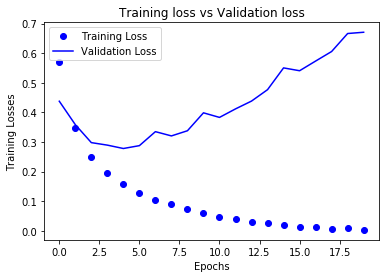

In [37]:
train_loss =network1_dict['loss']
validation_loss =network1_dict['val_loss']

#epochs = range(1, len(accuracy) + 1)
plt.plot(train_loss, 'bo', label ='Training Loss')
plt.plot(validation_loss, 'b', label ='Validation Loss')
plt.title('Training loss vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Training Losses')
plt.legend()

# we plot the training and validation accuracy

Text(0.5, 1.0, 'Training accuracy vs Validation Accuracy')

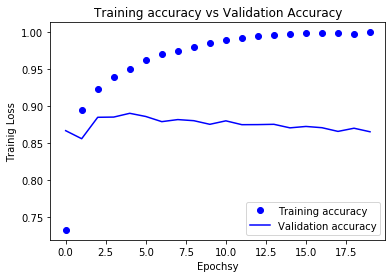

In [50]:
train_acc =network1_dict['accuracy']
val_acc_values =network1_dict['val_accuracy']
plt.plot(train_acc, 'bo', label='Training accuracy')
plt.plot(val_acc_values, 'b', label='Validation accuracy')
plt.xlabel('Epochsy')
plt.ylabel('Trainig Loss')
plt.legend()
plt.title('Training accuracy vs Validation Accuracy')

# We take a new model and evaluate it's performance on the test data

In [57]:
network2 =models.Sequential()
network2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
network2.add(layers.Dense(16, activation='relu'))
network2.add(layers.Dense(1, activation='sigmoid'))

In [58]:
network2.compile(optimizer ='rmsprop', loss='binary_crossentropy', metrics =['accuracy'])

In [59]:
network2.fit(x_train, y_train, epochs =10, batch_size =512)

Epoch 1/10
25000/25000 [==============================] - 7s 273us/step - loss: 0.4605 - accuracy: 0.8159
Epoch 2/10
25000/25000 [==============================] - 5s 193us/step - loss: 0.2650 - accuracy: 0.9088
Epoch 3/10
25000/25000 [==============================] - 5s 188us/step - loss: 0.2048 - accuracy: 0.9291
Epoch 4/10
25000/25000 [==============================] - 5s 186us/step - loss: 0.1705 - accuracy: 0.9403
Epoch 5/10
25000/25000 [==============================] - 5s 185us/step - loss: 0.1479 - accuracy: 0.9483
Epoch 6/10
25000/25000 [==============================] - 5s 193us/step - loss: 0.1291 - accuracy: 0.9564
Epoch 7/10
25000/25000 [==============================] - 5s 181us/step - loss: 0.1173 - accuracy: 0.95881s - loss: 0
Epoch 8/10
25000/25000 [==============================] - 5s 190us/step - loss: 0.1033 - accuracy: 0.96611s - loss:
Epoch 9/10
25000/25000 [==============================] - 5s 181us/step - loss: 0.0931 - accuracy: 0.9694
Epoch 10/10
25000/25000 

# we evaluate now

In [60]:
my_evaluation =network2.evaluate(x_test,y_test)

25000/25000 [==============================] - 15s 603us/step


# This gave us an accuracy of the model to be 86%

In [61]:
my_evaluation

[0.42074567745685576, 0.8660399913787842]

# We use the network on practical terms to predict a review

In [62]:
y_predict =network2.predict(x_test)

In [63]:
y_predict

array([[0.07260913],
       [0.99991035],
       [0.64440465],
       ...,
       [0.10291871],
       [0.01701248],
       [0.74032766]], dtype=float32)